In [1]:
import pandas as pd
from pandas import read_excel
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error 
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_leakage=pd.read_csv("../data/LeakagesWithoutAging.csv", sep=",")
df_leakage = df_leakage.head(14998)
df_leakage = df_leakage.drop(["Vin_A", "Vin_B"], axis=1)
df_leakage = shuffle(df_leakage)
df_leakage.head(5)

,temp,pvdd,cqload,nbodyn,nsdp,nc0subn,toxpn,hfinp,ni0subp,eotn,...,eotp,nbodyp,hfinn,tfinp,nc0subp,leak_and2,leak_nand2,leak_nor2,leak_xor2,leak_xnor2
12699,-42.170891,0.837854,2.982289,1.030000e+23,2.980000e+26,2.840000e+25,1.420000e-09,2.540000e-08,1.140000e+16,7.860000e-10,...,8.090000e-10,9.940000e+22,2.480000e-08,1.200000e-08,2.800000e+25,9.530000e-09,1.400000e-09,1.230000e-08,4.210000e-08,4.830000e-08
11357,118.904181,0.829675,2.201095,9.840000e+22,2.970000e+26,3.030000e+25,1.400000e-09,2.590000e-08,1.080000e+16,7.510000e-10,...,8.270000e-10,9.780000e+22,2.670000e-08,1.200000e-08,2.870000e+25,1.210000e-08,8.850000e-10,6.080000e-09,4.650000e-08,4.960000e-08
10727,18.970732,0.785929,0.801588,9.990000e+22,2.910000e+26,2.910000e+25,1.410000e-09,2.710000e-08,1.100000e+16,8.420000e-10,...,8.090000e-10,9.900000e+22,2.810000e-08,1.170000e-08,2.900000e+25,8.320000e-09,1.710000e-09,1.460000e-08,3.900000e-08,4.630000e-08
4091,118.054073,0.826353,2.167340,9.800000e+22,2.880000e+26,2.920000e+25,1.340000e-09,2.520000e-08,1.020000e+16,7.630000e-10,...,8.210000e-10,9.950000e+22,2.680000e-08,1.220000e-08,3.020000e+25,1.190000e-08,1.070000e-09,7.940000e-09,4.740000e-08,5.140000e-08
10192,-54.134038,0.785893,1.885885,1.020000e+23,3.000000e+26,2.800000e+25,1.390000e-09,2.730000e-08,1.160000e+16,8.010000e-10,...,7.870000e-10,9.720000e+22,2.520000e-08,1.210000e-08,3.020000e+25,7.440000e-09,1.040000e-09,7.390000e-09,3.100000e-08,3.470000e-08


In [3]:
print(len(df_leakage))
train_length = int(0.8*len(df_leakage))
val_length = len(df_leakage) - train_length
print(train_length, val_length)

input_columns=20
output_columns=5

14998
11998 3000


In [4]:
dataset_leakage = df_leakage.values
X_leakage = dataset_leakage[:train_length,0:input_columns]
y_leakage = dataset_leakage[:train_length,input_columns:]

In [5]:
scalarX_leakage, scalarY_leakage = MinMaxScaler(), MinMaxScaler()
scalarX_leakage.fit(X_leakage)
scalarY_leakage.fit(y_leakage.reshape(train_length,output_columns))
X_leakage = scalarX_leakage.transform(X_leakage)
y_leakage = scalarY_leakage.transform(y_leakage.reshape(train_length,output_columns))

In [14]:
rf_leakage = RandomForestRegressor(n_estimators= 500, criterion = 'mse', max_depth = None)
rf_leakage.fit(X_leakage, y_leakage);

In [15]:
X_test_leakage = dataset_leakage[train_length:,0:input_columns]
y_test_leakage = dataset_leakage[train_length:,input_columns:]

X_test_leakage = scalarX_leakage.transform(X_test_leakage)
y_testpred_leakage = rf_leakage.predict(X_test_leakage)
y_testpred2_leakage = scalarY_leakage.inverse_transform(y_testpred_leakage)

y_trainpred_leakage = rf_leakage.predict(X_leakage)
y_trainpred2_leakage = scalarY_leakage.inverse_transform(y_trainpred_leakage)

y_2_leakage = scalarY_leakage.inverse_transform(y_leakage)

In [16]:
for i in range(output_columns):
    r2_train = r2_score(y_trainpred2_leakage[:,i], y_2_leakage[:,i])
    r2_test = r2_score(y_testpred2_leakage[:,i], y_test_leakage[:,i])
    print("Train R2 Score for "+df_leakage.columns[input_columns+i]+" : "+str(r2_train))
    print("Test  R2 Score for "+df_leakage.columns[input_columns+i]+" : "+str(r2_test))
    print()

Train R2 Score for leak_and2 : 0.9895357297891548
Test  R2 Score for leak_and2 : 0.9367648058736792

Train R2 Score for leak_nand2 : 0.9929285920070154
Test  R2 Score for leak_nand2 : 0.9412063829200541

Train R2 Score for leak_nor2 : 0.9918498846740814
Test  R2 Score for leak_nor2 : 0.9349508762878047

Train R2 Score for leak_xor2 : 0.9908144835896144
Test  R2 Score for leak_xor2 : 0.9430113520536296

Train R2 Score for leak_xnor2 : 0.9913616244329044
Test  R2 Score for leak_xnor2 : 0.9454011398996978



In [17]:
sum=0
count=0
for i in range(train_length):
    for j in range(output_columns):        
        error = abs(y_trainpred2_leakage[i,j] - y_2_leakage[i,j])/(y_2_leakage[i,j])
        sum+=error
print("Mean Train Accuracy: {:.2f} %".format(100 - (sum/(train_length*output_columns) * 100)))

Mean Train Accuracy: 97.22 %


In [18]:
sum=0
count=0
for i in range(val_length):
    for j in range(output_columns):  
        error = abs(y_testpred2_leakage[i,j] - y_test_leakage[i,j])/(y_test_leakage[i,j])
        sum+=error    
print("Mean Test Accuracy: {:.2f} %".format(100 - (sum/(val_length*output_columns) * 100)))

Mean Test Accuracy: 92.56 %


In [19]:
tree = rf_leakage.estimators_[5]
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 24


In [20]:
importances = list(rf_leakage.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_leakage.columns[:input_columns], importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: lg                   Importance: 0.55
Variable: tfinn                Importance: 0.23
Variable: tfinp                Importance: 0.13
Variable: pvdd                 Importance: 0.02
Variable: eotn                 Importance: 0.02
Variable: eotp                 Importance: 0.01
Variable: hfinn                Importance: 0.01
Variable: temp                 Importance: 0.0
Variable: cqload               Importance: 0.0
Variable: nbodyn               Importance: 0.0
Variable: nsdp                 Importance: 0.0
Variable: nc0subn              Importance: 0.0
Variable: toxpn                Importance: 0.0
Variable: hfinp                Importance: 0.0
Variable: ni0subp              Importance: 0.0
Variable: ni0subn              Importance: 0.0
Variable: toxpp                Importance: 0.0
Variable: nsdn                 Importance: 0.0
Variable: nbodyp               Importance: 0.0
Variable: nc0subp              Importance: 0.0


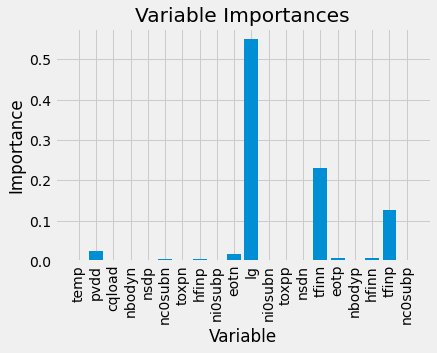

In [21]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, df_leakage.columns[:input_columns], rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 